In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.L = len(layers)
        
        self.number_feature = layers[0]
        self.number_class = layers[-1]
        
        self.W = {}
        self.b = {}
        
        self.dw = {}
        self.db = {}
        
        self.setup()
        
    def setup(self):
        for i in range(1, self.L):
            self.W[i] = tf.Variable(tf.random.normal(shape = (self.layers[i], self.layers[i-1])))
            self.b[i] = tf.Variable(tf.random.normal(shape = (self.layers[i], 1)))

In [3]:
#Forward propagation
class NeuralNetwork(NeuralNetwork):
    def forwardPass(self, A):
        A = tf.convert_to_tensor(A, dtype=float32)
        for i in range(1, self.L):
            Z = tf.matmul(A, tf.transpose(self.W[i])) + tf.transpose(self.b[i])
            if i!= self.L-1:
                A = tf.nn.relu(Z)
            else:
                A = Z
        return A

In [4]:
#We will use this section to calculate loss function and upgrading the previous parameters
class NeuralNetwork(NeuralNetwork):
    def compute_loss(self, A, Y):
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Y, A))
    
    def upgrade_parameters(self, lr):
        for i in range(1, self.L):
            self.W[i].assing_sub(lr*self.dw[i])
            self.b[i].assing_sub(lr*self.db[i])
            

In [5]:
class NeuralNetwork(NeuralNetwork):
    def predict(self, x):
        A = self.forwardPass(x)
        return tf.argmax(tf.nn.softmax(A), axis = 1)
    
    def info(self):
        num_params = 0
        for i in range(1, self.L):
            num_params += self.W[i].shape[0] * self.W[i].shape[1]
            num_params += self.b[i].shape[0]
        
        print ("Number of feature: {}".format(self.number_feature))
        print ("Total number of class is: {}".format(self.number_class))
        
        print ("Hidden layer information is: ")
        for i in range(1, self.L-1):
            print("Layer: {}, Units: {}".format(i, self.layers[i]))
        
        print("Total number of parameters: {}".format(num_params))
            

In [6]:
class NeuralNetwork(NeuralNetwork):
    def training_on_batch(self,x,y,lr):
        x= tf.convert_to_tensor(x,dtype= tf.folat32)
        y= tf.convert_to_tensor(y,dtype= tf.folat32)
        
        
        with tf.GradientTape(persistent= True) as tape:
            A =self.forwardPass(x)
            loss= self.compute_loss(A,y)
            
        for key in self.w.keys():
            self.dw[key] = tape.gradient(loss,self.w[key])
            self.db[key] = tape.gradient(loss,self.b[key])
            
        del tape
        
        self.upgrade_parameters(lr)
        
        return loss.numpy()

In [7]:
#Training 
class NeuralNetwork(NeuralNetwork):
    def train(self,x_train,y_train,x_test,y_test,epochs,step_per_epochs,batch_size,lr):
        history={
            'val_loss'  :[],
            'train_loss':[],
            'val_acc'   :[]
            
        }
        
        
        
        for e in range(0,epochs):
            training_loss_epochs =0.0
            print('Epochs {}'.format(e),end='|')
            for i in range(step_per_epochs):
                x_batch    = x_train[i + batch_size : (i+1)*batch_size]
                y_batch    = y_train[i + batch_size : (i+1)*batch_size]
                batch_loss = self.training_on_batch(x_batch,y_batch,lr)
                epochs_loss_trin += batch_loss
                
                
                if i %int(step_per_epochs/10) == 0:
                    print(end= ',')
                    
            history['train_loss'].append(epochs_loss_trin/step_per_epochs)
            
            valA =self.forwardPass(x_test)
            history['val_loss'].append(self.compute_loss(y_test,valA.numpy))
            
            valuePr= self.predictdictdictredict(x_test)
            history['val_acc'].append(np.mean(np.argmax(y_test,axis=1)== valuePr.numpy))
            print('Value Accuracy: ',history['val_acc'][-1])
        
        return history    

In [8]:
def loadDatasets():
    (x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
    x_train = np.reshape(x_train,(x_train.shape[0],784))/255.0
    y_train = tf.keras.utils.to_categorical(y_train)
    x_test  = np.reshape(x_test,(x_test.shape[0],784))/255.0
    y_test  = tf.keras.utils.to_categorical(y_test)
    
    print('X Trian Datasets Shape: {}'.format(x_train.shape))
    print('Y Test Data {}'.format(y_test))
    
    
    return (x_train,y_train),(x_test,y_test)

def plot_random_sample(x,y, p=None):
    indicies = np.random.choice(range(0, x.shape[0]),10)
    y=np.argmax(y,axis= 1)
    
    
    if p is None:
        p=y
    
    plt.figure(figsize=(10,4))
    for i, index in enumerate(indicies):
        plt.subplot(2,5, i+1)
        plt.imshow(x[index].reshape((28,28)),cmap ='binary')
        plt.xticks([])
        plt.yticks([])
        plt.gray()
        
        
        if y[index] == p[index]:
            col = 'g'
        else:
            col = 'r'
        plt.xlabel(str(p[index]),color= col)
        
    return plt

In [9]:
(x_train,y_train),(x_test,y_test)=loadDatasets()

X Trian Datasets Shape: (60000, 784)
Y Test Data [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


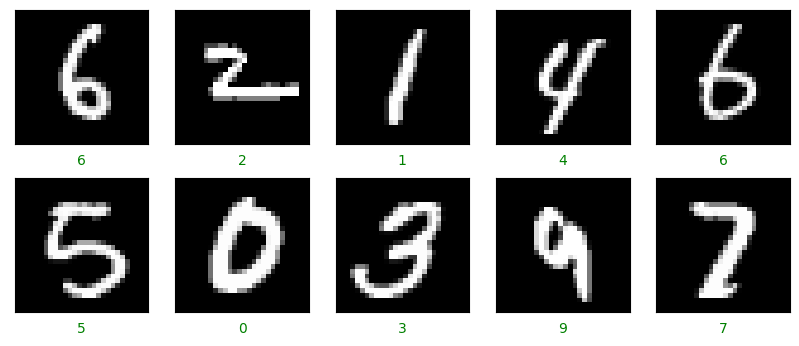

In [10]:
plot_random_sample(x_train,y_train).show()